# <font color='#ef1111'>  The Ultimate Halloween Candy Power Ranking
    
Regression on The Ultimate Halloween Candy Power Ranking dataset.

    
<code>candy-data.csv</code> includes attributes for each candy along with its ranking. For binary variables, 1 means yes, 0 means no. The data contains the following fields:

-  chocolate: Does it contain chocolate?
    
    
-  fruity: Is it fruit flavored?
    
    
-  caramel: Is there caramel in the candy?
    
    
-  peanutalmondy: Does it contain peanuts, peanut butter or almonds?
    
    
-  nougat: Does it contain nougat?
    
    
-  crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
    
    
-  hard: Is it a hard candy?
    
    
-  bar: Is it a candy bar?
    
    
-  pluribus: Is it one of many candies in a bag or box?
    
    
-  sugarpercent: The percentile of sugar it falls under within the data set.
    
    
-  pricepercent: The unit price percentile compared to the rest of the set.
    
    
-  winpercent: The overall win percentage according to 269,000 matchups.
    
    
    
    
<hr>
    

    
**Goal :**
    
Can you predict if a candy is chocolate or not based on its other features?
    
<hr> 
    
Everything required for this exercise is available at : 
    
    
   
***GitHub***  : <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU.git" > Main (class) repo </a> 
    &nbsp;&nbsp;&nbsp;
    <a href = "https://github.com/A-M-Kharazi/Machine-Learning-TMU/tree/main/Questions/Q-Series3" > This Document page</a>
    
    
***GoogleDrive*** : <a href = "https://drive.google.com/drive/folders/1l3P_yFAoYrip1KmuajKSa5a_eymcd-tJ?usp=sharing" > Q-ML-series3 google drive </a>
    

# <font color='#ef1111'>  Import libraries
    
<hr>
    
Just as the title says. Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# <font color='#ef1111'>  Import data
<hr>
    

Using pandas to read the data. Data is availabe from the sourse website (Kaggle). You can download the data from this link :
<a href = "https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking">The Ultimate Halloween Candy Power Ranking
</a>
    


In [2]:
path = "../Data/"
dataset = pd.read_csv(path + "candy-data.csv")

## <font color='#ef1111'>   data information
    
Information about column data types and the shape of the dataset.
    
There are 85 samples with 13 columns of dependant and independent variables.
    
You can check top 5 samples of the dataset

In [3]:
print(dataset.dtypes)
print("shape of the dataset is : ",dataset.shape)

competitorname       object
chocolate             int64
fruity                int64
caramel               int64
peanutyalmondy        int64
nougat                int64
crispedricewafer      int64
hard                  int64
bar                   int64
pluribus              int64
sugarpercent        float64
pricepercent        float64
winpercent          float64
dtype: object
shape of the dataset is :  (85, 13)


In [4]:
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


## <font color='#ef1111'>   few useless columns and new dataframes

    
Our Objective is to predict if a candy is chocholate or not based on its other features. It is obvious that the name variable is not relevant. 
    
The main Issue or challange with this Data is that the target value is categorical. In our case it is a boolean.

In [5]:
task = dataset.drop(columns  = ['competitorname'])

In [6]:
task.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


## <font color='#ef111'>   train and test split
    
Split a portion of data so that it can be used as test to evaluate our model. 

In [8]:
task_x = task.drop(columns = ['chocolate'])
task_y = task['chocolate']
task_x_train, task_x_test, task_y_train, task_y_test = train_test_split(task_x, task_y, test_size= 0.25)

# <font color='#ef1111'>   Model
 
<hr>
    
    
Data is ready to be used by our model, so before that we need to create a model that can train on these data. The target value is categorical which means it is not continuous. We used to work with continuous variables as X and t, however in this case majority of variables are different. 

In [9]:
model = LogisticRegression()
model.fit(task_x_train , task_y_train)

LogisticRegression()

## <font color='#ef1111'>   Predict
    
Our goal is to use these models to predict the whether the candy is chocolate or not

In [11]:
predict_tr = model.predict(task_x_train)
predict_te = model.predict(task_x_test)

## <font color='#ef1111'> Evaluation
    
We can't use RMSE in this case since our data is categorical and what we accomplished is similar to classification, therefore we need to use classification's tools of evaluation

In [12]:
task_score = {
        'train' :  model.score(task_x_train,task_y_train),
        'test' : model.score(task_x_test, task_y_test)
}

# <font color='#ef1111'>   Result
 
<hr>
    
You can check the result of our model here.
  
We will also Visualize our predicted vs actual data on both train and test for our task.

In [13]:
print("Model Score on training Data : ",task_score['train'])
print("Model Score on testing Data : ",task_score['test'])

Model Score on training Data :  0.9206349206349206
Model Score on testing Data :  0.9090909090909091


In [14]:
df_yyhat_tr = pd.DataFrame({'y' : task_y_train , 'yhat' : predict_tr})
df_yyhat_te = pd.DataFrame({'y' : task_y_test , 'yhat' : predict_te})

In [15]:
df_yyhat_tr.head()

,y,yhat
62,1,0
39,1,1
56,1,1
12,0,0
49,0,0


In [16]:
df_yyhat_te.head()

,y,yhat
65,1,1
84,1,1
63,0,0
41,0,0
25,1,1


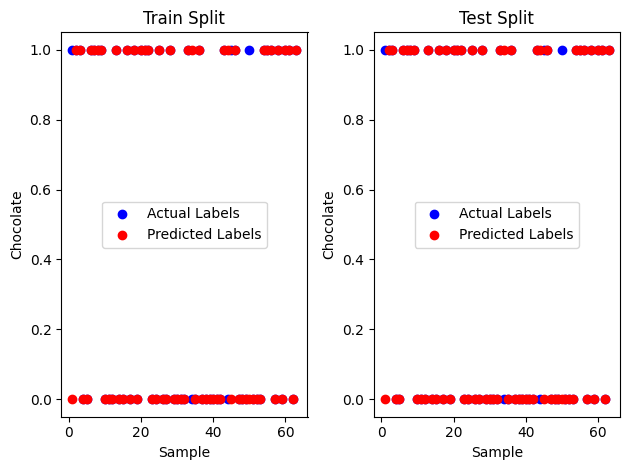

In [17]:
fig, ax = plt.subplots(1,2)


ax[0].scatter([i+1 for i in range(len(task_y_train))]
            ,task_y_train,color = 'blue',alpha = 1,label = 'Actual Labels')
ax[0].scatter([i+1 for i in range(len(predict_tr))]
            ,predict_tr,color = 'red',alpha = 1,label = 'Predicted Labels')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Chocolate')
ax[0].set_title('Train Split')
ax[0].legend(loc = 'center')

ax[1].scatter([i+1 for i in range(len(task_y_train))]
            ,task_y_train,color = 'blue',alpha = 1,label = 'Actual Labels')
ax[1].scatter([i+1 for i in range(len(predict_tr))]
            ,predict_tr,color = 'red',alpha = 1,label = 'Predicted Labels')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Chocolate')
ax[1].set_title('Test Split')
ax[1].legend(loc = 'center')


fig.tight_layout()
plt.show()
